<a href="https://colab.research.google.com/github/suyeonlee333333/oss2025/blob/main/free_rider_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get -y install -qq fonts-nanum

# 🚇 무임승차 손실 예측 시뮬레이터
기준 연령에 따라 무임인원 → 무임손실액 → 총손실액을 예측하는 모델을 구성합니다.

In [3]:
# 1️⃣ 파일 불러오기
import pandas as pd
file_path = 're_study_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,연도,월,연령,지하철 이용량,고령 인구수,무임인원,무임인원비율,무임손실 (백만),누적손실액
0,2021,1,65,17834292,649577,5419112,0.303859,7586.7568,7586.7568
1,2021,2,65,18431141,652254,5505261,0.298693,7707.3654,15294.1222
2,2021,3,65,23348552,655874,7028495,0.301025,9839.8930,25134.0152
3,2021,4,65,22250031,658150,6783118,0.304859,9496.3652,34630.3804
4,2021,5,65,22606497,660561,6864538,0.303653,9610.3532,44240.7336


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

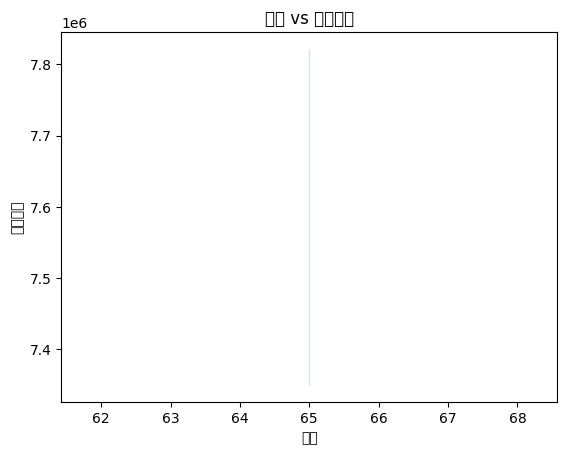

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

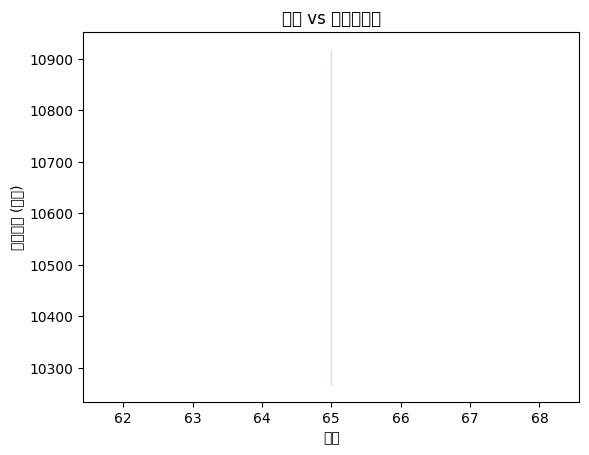

In [4]:

# 2. 런타임 재시작 없이 바로 적용되도록 캐시 재설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 3. 현재 설치된 폰트 경로 중 나눔 폰트 경로 찾기
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 예시
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
sns.lineplot(data=df, x='연령', y='무임인원')
plt.title('연령 vs 무임인원')
plt.show()

sns.lineplot(data=df, x='연령', y='무임손실 (백만)')
plt.title('연령 vs 무임손실액')
plt.show()

In [5]:
# 3️⃣ 학습 - 연령 -> 무임인원
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['연령']]
y = df['무임인원']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [6]:
# 4️⃣ 무임인원 -> 무임손실액
X2 = df[['무임인원']]
y2 = df['무임손실 (백만)']
model_2 = LinearRegression()
model_2.fit(X2, y2)

LinearRegression()

In [7]:
# 5️⃣ 무임손실액 -> 총손실액
X3 = df[['무임손실 (백만)']]
y3 = df['누적손실액']
model_3 = LinearRegression()
model_3.fit(X3, y3)

LinearRegression()

In [8]:
# 6️⃣ 시뮬레이션 함수
def simulate_loss(age):
    count = model_1.predict([[age]])[0]
    loss = model_2.predict([[count]])[0]
    total = model_3.predict([[loss]])[0]
    return count, loss, total

simulate_loss(70)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(np.float64(7636780.8292682925),
 np.float64(10691.49316097561),
 np.float64(65088.19357820717))

In [9]:
# 7️⃣ Gradio UI
import gradio as gr

def predict_loss(age):
    count, loss, total = simulate_loss(age)
    return {
        '예상 무임인원': round(count),
        '예상 무임손실액': round(loss),
        '예상 총손실액': round(total)
    }

gr.Interface(fn=predict_loss, inputs=gr.Slider(60, 100, step=1, label='기준 연령'), outputs='json').launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82f513a297fff077d5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
